1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

eigenvalues  cov(X):
 [ 2.82921436e+01 -5.34822168e-17  1.95180800e+00]
eigenvectors cov(X):
 [[-0.10896172 -0.81649658  0.56697502]
 [-0.58543803 -0.40824829 -0.70042534]
 [-0.80336147  0.40824829  0.43352471]]

eigenvalues  from SVD:
 [2.83471156e+01 1.95235587e+00 7.13183107e-31]
eigenvectors from SVD:
 [[-0.10907973  0.56695233 -0.81649658]
 [-0.58529223 -0.70054717 -0.40824829]
 [-0.80345169  0.43335749  0.40824829]]

The results are the same (within numerical approximation and reordering: w/SVD eigenvalues are in decreasing order)

variability principal component 1: 93.55%
variability principal component 2: 0.00%
variability principal component 3: 6.45%
if I keep the PC1 and PC3, I retain ~100.0% of the total variability
This make sense since the second feature is simply the first feature affected by white noise


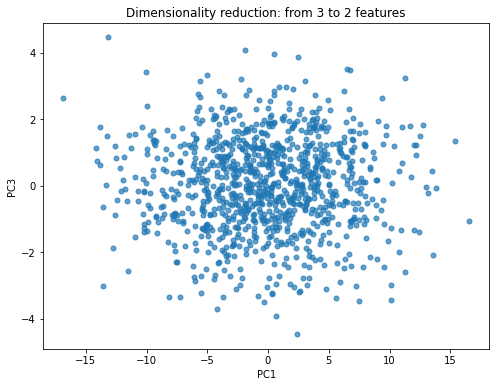

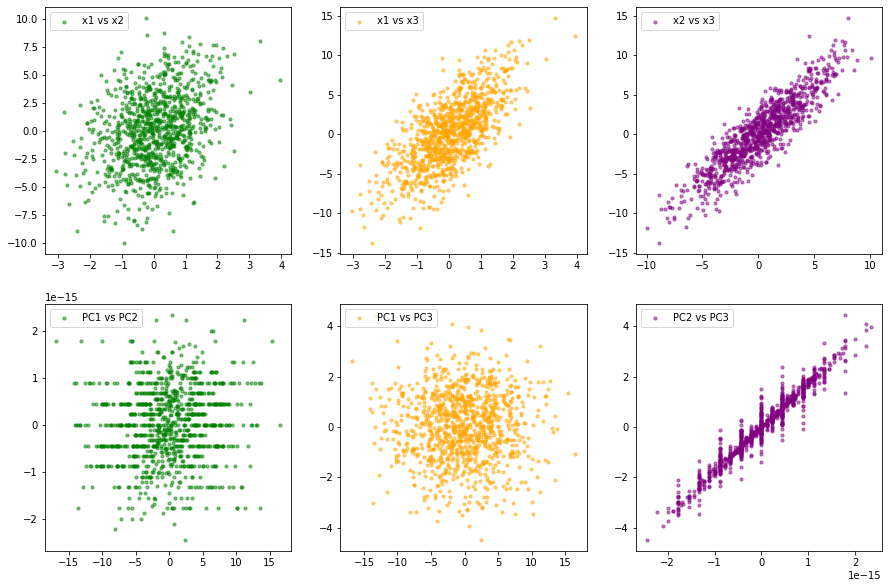

In [2]:
N = 1000
np.random.seed(1)

x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = np.random.normal(loc=0, scale=3, size=N) + x1
x3 = 2 * x1 + x2
X  = np.vstack((x1, x2, x3))

cov = np.cov(X)

# eigenvalue decomposition of the covariance matrix: cov(X) = V L V^-1 
l, V = la.eig(cov)
l = np.real_if_close(l)
print('eigenvalues  cov(X):\n', l)
print('eigenvectors cov(X):\n', V)
print()

# SVD of the data matrix: X = U D V^t
# where columns of U are eigenvectors of X X^t,
# and diag(D^t D) are the eigenvalues of X X^t
# remember: cov(X) = (X X^t) / (N-1) when the rows of X are zero-mean
U, D, Vt = np.linalg.svd(X)
l_svd = D**2 / (N - 1)
V_svd = U
print('eigenvalues  from SVD:\n', l_svd)
print('eigenvectors from SVD:\n', V_svd)
print()

print('The results are the same (within numerical approximation and reordering: w/SVD eigenvalues are in decreasing order)\n')

# to select the best features intrested only on the magnitude of the variability
l = np.abs(l)
components = l / np.sum(l) * 100
for i in range(len(components)):
    print(f'variability principal component {i+1}: {components[i]:.2f}%')
print(f'if I keep the PC1 and PC3, I retain ~{components[0]+components[2]:.1f}% of the total variability')
print('This make sense since the second feature is simply the first feature affected by white noise')

# project the datapoints on the new basis of principal components
V_red = V[:,[0,2]]
X_red = np.matmul(V_red.T, X)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_red[0,:], X_red[1,:], alpha=.7, s=25)
ax.set_title('Dimensionality reduction: from 3 to 2 features')
ax.set_ylabel('PC3')
ax.set_xlabel('PC1')

# change basis (principal eigenvectors)
Xp = np.matmul(V.T, X)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0,0].scatter(X[0,:], X[1,:], alpha=.5, s=10, color='green', label='x1 vs x2')
axs[0,1].scatter(X[0,:], X[2,:], alpha=.5, s=10, color='orange', label='x1 vs x3')
axs[0,2].scatter(X[1,:], X[2,:], alpha=.5, s=10, color='purple', label='x2 vs x3')

axs[1,0].scatter(Xp[0,:], Xp[1,:], alpha=.5, s=10, color='green', label='PC1 vs PC2')
axs[1,1].scatter(Xp[0,:], Xp[2,:], alpha=.5, s=10, color='orange', label='PC1 vs PC3')
axs[1,2].scatter(Xp[1,:], Xp[2,:], alpha=.5, s=10, color='purple', label='PC2 vs PC3')

for ax in axs.flatten():
    ax.legend(loc='upper left')

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
n = 10 # number of variables
mu = [0] * n
sigma = np.diag([1./20] * n) # uncorrelated normal variables

X2 = np.random.multivariate_normal(mu, sigma, N).T
X2 = np.vstack((X, X2))
print('Dataset shape (#features, #samples):', X2.shape)
print()

cov2 = np.cov(X2)

# eigenvalue decomposition of the covariance matrix: cov(X) = V L V^-1 
l2, V2 = la.eig(cov2)
l2 = np.real_if_close(l2)
print('eigenvalues cov(X2):\n', l2)
print()

# to select the best features intrested only on the magnitude of the variability
l2 = np.abs(l2)
components2 = l2 / np.sum(l2) * 100
for i in range(len(components)):
    print(f'variability PC{i+1}: {components2[i]:.2f}%')
print(f'if I keep the PC1 and PC1, I retain ~{components2[0]+components2[1]:.1f}% of the total variability')

Dataset shape (#features, #samples): (13, 1000)

eigenvalues cov(X2):
 [ 2.82924498e+01  1.95214209e+00 -5.88372444e-16  5.91189603e-02
  5.68135374e-02  5.44836099e-02  4.22227384e-02  4.35232460e-02
  5.11344339e-02  4.97516736e-02  4.73523392e-02  4.63554818e-02
  4.67741604e-02]

variability PC1: 92.03%
variability PC2: 6.35%
variability PC3: 0.00%
if I keep the PC1 and PC1, I retain ~98.4% of the total variability


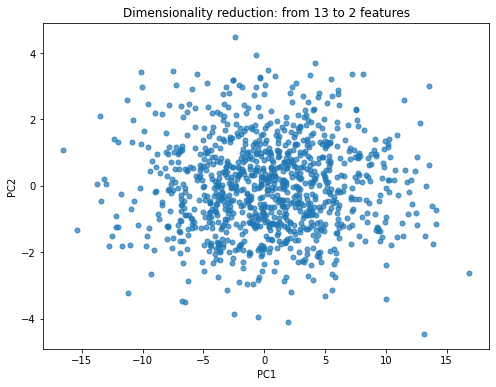

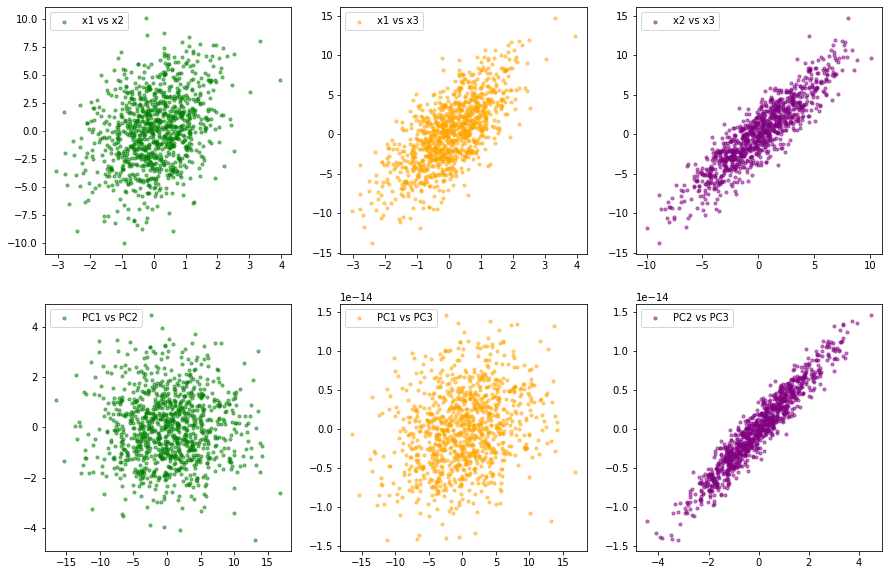

In [4]:
# project the datapoints on the new basis of principal components
V2_red = V2[:,[0,1]]
X2_red = np.matmul(V2_red.T, X2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X2_red[0,:], X2_red[1,:], alpha=.7, s=25)
ax.set_title('Dimensionality reduction: from 13 to 2 features')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')

# change basis (principal eigenvectors)
X2p = np.matmul(V2.T, X2)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0,0].scatter(X2[0,:], X2[1,:], alpha=.5, s=10, color='green', label='x1 vs x2')
axs[0,1].scatter(X2[0,:], X2[2,:], alpha=.5, s=10, color='orange', label='x1 vs x3')
axs[0,2].scatter(X2[1,:], X2[2,:], alpha=.5, s=10, color='purple', label='x2 vs x3')
# I don't consider all the other combinations (we already know they are uncorrelated gaussians)

axs[1,0].scatter(X2p[0,:], X2p[1,:], alpha=.5, s=10, color='green', label='PC1 vs PC2')
axs[1,1].scatter(X2p[0,:], X2p[2,:], alpha=.5, s=10, color='orange', label='PC1 vs PC3')
axs[1,2].scatter(X2p[1,:], X2p[2,:], alpha=.5, s=10, color='purple', label='PC2 vs PC3')

for ax in axs.flatten():
    ax.legend(loc='upper left')

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [6]:
import pandas as pd

columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('data/magic04.data', names=columns)
df = df.drop('class', axis=1) # drop 'class' column (not a number)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [7]:
X = df - df.mean(axis=0, numeric_only=True) # center the variables around the mean
X = X.T # change to shape (#variables,#samples)
n = X.shape[1]

In [8]:
# perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# rescale the SVD spectrum to get the eigenvalues
l = S**2/(n-1)
# The matrix U already contains the eigenvectors
V = U

In [9]:
# to select the best features intrested only on the magnitude of the variability
components = l / np.sum(l) * 100
for i in range(len(components)):
    print(f'variability PC{i+1}: {components[i]:.2f}%')
print(f'if I keep PC1, PC2 and PC3, I retain ~{components[0]+components[1]+components[2]:.1f}% of the total variability')

variability PC1: 44.05%
variability PC2: 25.80%
variability PC3: 13.50%
variability PC4: 8.88%
variability PC5: 4.08%
variability PC6: 2.90%
variability PC7: 0.79%
variability PC8: 0.00%
variability PC9: 0.00%
variability PC10: 0.00%
if I keep PC1, PC2 and PC3, I retain ~83.3% of the total variability


In [10]:
# project the datapoints on the new basis of reduced principal components
V_red = V[:,[0,1,2]]
X_red = np.matmul(V_red.T, X)

Text(0.5, 0, 'PC2')

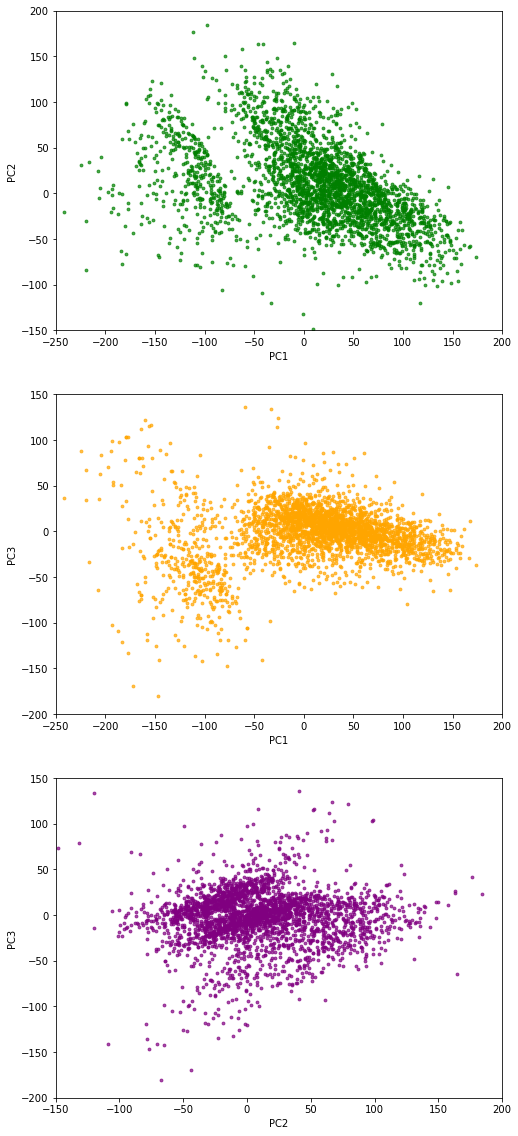

In [11]:
samples = 3000 # number of samples to plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,20))

ax1.scatter(X_red.iloc[0,:samples], X_red.iloc[1,:samples], alpha=.7, s=8, c='green')
ax1.axis([-250, 200, -150, 200])
ax1.set_ylabel('PC2')
ax1.set_xlabel('PC1')

ax2.scatter(X_red.iloc[0,:samples], X_red.iloc[2,:samples], alpha=.7, s=8, c='orange')
ax2.axis([-250, 200, -200, 150])
ax2.set_ylabel('PC3')
ax2.set_xlabel('PC1')

ax3.scatter(X_red.iloc[1,:samples], X_red.iloc[2,:samples], alpha=.7, s=8, c='purple')
ax3.axis([-150, 200, -200, 150])
ax3.set_ylabel('PC3')
ax3.set_xlabel('PC2')